In [125]:
import networkx as nx
import numpy as np
from scipy import sparse
from prebuilt_code.ssf_masked.src_py.read_ccodes import *
import matplotlib.pyplot as plt
import itertools

In [135]:
n_list = []
m_list = []
dv_list = []
dc_list = []
id_list = []
file_name_list = ["prebuilt_code/ssf_masked/ccode/60_50_5_6.code"]

code_list = read_ccode(file_name_list, n_list, m_list, dv_list, dc_list, id_list)
ccode = code_list[0]

In [136]:
check_nbhd = ccode.check_nbhd

H = np.zeros((ccode.m, ccode.n))
for i, check in enumerate(check_nbhd):
    for bit in check:
        H[i][bit] = 1
H = sparse.csc_matrix(H)

hx1 = sparse.kron(H, np.eye(H.shape[1], dtype=bool))
hx2 = sparse.kron(np.eye(H.shape[0], dtype=bool), H.T)
Hx = sparse.csr_matrix(sparse.hstack([hx1, hx2], ))

hz1 = sparse.kron(np.eye(H.shape[1], dtype=bool), H)
hz2 = sparse.kron(H.T, np.eye(H.shape[0], dtype=bool))
Hz = sparse.csr_matrix(sparse.hstack([hz1, hz2]))
qH = sparse.vstack([Hx, Hz]).tocsc()

n = qH.shape[1]
m = qH.shape[0]

In [137]:
G = nx.Graph()
G.add_nodes_from(np.arange(qH.shape[0]))

In [138]:
for i in range(qH.shape[1]):
    checks = qH[:, i].indices
    for pair in itertools.combinations(checks, 2):
        G.add_edge(pair[0], pair[1])

In [132]:
def percolation(G, p):
    """
    returns components if edges are removed from G with probability p
    (starting from empty graph adding edges with probability (1-p))
    """
    G_copy = G.copy()
    edges = list(G_copy.edges)
    for edge in edges:
        if (np.random.random() < p):
            G_copy.remove_edge(edge[0], edge[1])
            
    comps = sorted(nx.connected_components(G_copy), key=len, reverse=True)
    return comps[0] # return giant component

In [140]:
ps = np.linspace(0,0.1,100)
gcc_sizes = [len(percolation(G, 1-p)) for p in ps]

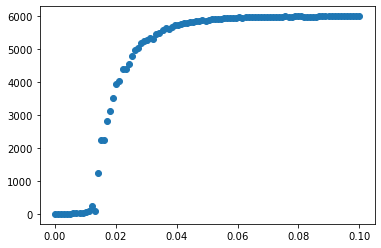

In [141]:
plt.scatter(ps, gcc_sizes)